# PySpark

In [1]:
#!pip install pyspark

import pyspark
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('Subway').getOrCreate()
spark

**Dataframe general commands**

In [3]:
# read the dataset

df = spark.read.csv('../data/subway.csv', header=True, inferSchema=True)

In [4]:
#df.show()

In [5]:
type(df)

pyspark.sql.dataframe.DataFrame

In [6]:
df.head(2)

[Row(index=0, name='Subway', url='http://order.subway.com/Stores/Redirect.aspx?s=30061&sa=0&f=c', street_address='1800 Duke St, Ste 100', city='Alexandria', state='VA', zip_code='22314', country='USA', phone_number_1=None, phone_number_2=None, fax_1=None, fax_2=None, email_1=None, email_2=None, website=None, open_hours='Monday 7:00 AM - 7:00 PM, Tuesday 7:00 AM - 7:00 PM, Wednesday 7:00 AM - 7:00 PM, Thursday 7:00 AM - 7:00 PM, Friday 7:00 AM - 7:00 PM, Saturday 8:00 AM - 5:00 PM', latitude=38.8043, longitude=-77.0611, facebook=None, twitter=None, instagram=None, pinterest=None, youtube=None),
 Row(index=1, name='Subway', url='http://order.subway.com/Stores/Redirect.aspx?s=36022&sa=0&f=c', street_address='1512 King St,', city='Alexandria', state='VA', zip_code='22301', country='USA', phone_number_1=None, phone_number_2=None, fax_1=None, fax_2=None, email_1=None, email_2=None, website=None, open_hours='Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:00 PM, Tuesday 7:00 AM - 9:00 PM, Wednes

In [7]:
# check the schema and datatypes of columns

df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- url: string (nullable = true)
 |-- street_address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- country: string (nullable = true)
 |-- phone_number_1: string (nullable = true)
 |-- phone_number_2: string (nullable = true)
 |-- fax_1: string (nullable = true)
 |-- fax_2: string (nullable = true)
 |-- email_1: string (nullable = true)
 |-- email_2: string (nullable = true)
 |-- website: string (nullable = true)
 |-- open_hours: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- facebook: string (nullable = true)
 |-- twitter: string (nullable = true)
 |-- instagram: string (nullable = true)
 |-- pinterest: string (nullable = true)
 |-- youtube: string (nullable = true)



In [8]:
# get all column names

df.columns

['index',
 'name',
 'url',
 'street_address',
 'city',
 'state',
 'zip_code',
 'country',
 'phone_number_1',
 'phone_number_2',
 'fax_1',
 'fax_2',
 'email_1',
 'email_2',
 'website',
 'open_hours',
 'latitude',
 'longitude',
 'facebook',
 'twitter',
 'instagram',
 'pinterest',
 'youtube']

**Data preparation**

In [9]:
# show only specific columns

df_new = df.select(['street_address', 'city', 'state', 'zip_code', 'open_hours', 'latitude', 'longitude',])

df_new.head(7)

[Row(street_address='1800 Duke St, Ste 100', city='Alexandria', state='VA', zip_code='22314', open_hours='Monday 7:00 AM - 7:00 PM, Tuesday 7:00 AM - 7:00 PM, Wednesday 7:00 AM - 7:00 PM, Thursday 7:00 AM - 7:00 PM, Friday 7:00 AM - 7:00 PM, Saturday 8:00 AM - 5:00 PM', latitude=38.8043, longitude=-77.0611),
 Row(street_address='1512 King St,', city='Alexandria', state='VA', zip_code='22301', open_hours='Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:00 PM, Tuesday 7:00 AM - 9:00 PM, Wednesday 7:00 AM - 9:00 PM, Thursday 7:00 AM - 9:00 PM, Friday 7:00 AM - 9:00 PM, Saturday 8:00 AM - 8:00 PM', latitude=38.8062, longitude=-77.0565),
 Row(street_address='2361 Eisenhower Ave,', city='Alexandria', state='VA', zip_code='22314', open_hours='Sunday 9:00 AM - 8:30 PM, Monday 6:30 AM - 9:00 PM, Tuesday 6:30 AM - 9:00 PM, Wednesday 6:30 AM - 9:00 PM, Thursday 6:30 AM - 9:00 PM, Friday 6:30 AM - 9:30 PM, Saturday 8:00 AM - 9:30 PM', latitude=38.8012, longitude=-77.0691),
 Row(street_address='320 Ki

In [10]:
df_new.describe().show()

+-------+--------------------+-----------+-----+-----------------+--------------------+-----------------+------------------+
|summary|      street_address|       city|state|         zip_code|          open_hours|         latitude|         longitude|
+-------+--------------------+-----------+-----+-----------------+--------------------+-----------------+------------------+
|  count|               25533|      25533|25533|            25533|               25395|            25533|             25533|
|   mean|                null|       null| null|52053.71454455609|                null|37.34792054987669|-92.13910667371638|
| stddev|                null|       null| null|27822.60374376891|                null|5.506921531868631|15.710247412191462|
|    min|# PR 159, Gulf Ga...|   29 Palms|   AK|            00601|Monday 10:00 AM -...|          17.9731|         -165.4006|
|    max|aka Goldens Bridg...|south China|   WY|       99901-6409|Tuesday 9:00 AM -...|          71.2885|           -65.443|


In [11]:
# adding columns in dataframe

df_new = df_new.withColumn('city_double', df_new['city'])
df_new.show(7)

+--------------------+----------+-----+--------+--------------------+--------+---------+-----------+
|      street_address|      city|state|zip_code|          open_hours|latitude|longitude|city_double|
+--------------------+----------+-----+--------+--------------------+--------+---------+-----------+
|1800 Duke St, Ste...|Alexandria|   VA|   22314|Monday 7:00 AM - ...| 38.8043| -77.0611| Alexandria|
|       1512 King St,|Alexandria|   VA|   22301|Sunday 9:00 AM - ...| 38.8062| -77.0565| Alexandria|
|2361 Eisenhower Ave,|Alexandria|   VA|   22314|Sunday 9:00 AM - ...| 38.8012| -77.0691| Alexandria|
|320 King Street, ...|Alexandria|   VA|   22314|Sunday 9:00 AM - ...| 38.8045| -77.0433| Alexandria|
|5836 N. Kings Hwy...|Alexandria|   VA|   22303|Sunday 9:00 AM - ...| 38.7903| -77.0769| Alexandria|
|101 Independence ...|Washington|   DC|   20540|Monday 10:00 AM -...| 38.8871| -77.0041| Washington|
|Rayburn Bldg., 45...|Washington|   DC|   20515|Monday 11:00 AM -...|  38.887| -77.0106| Wa

In [12]:
# drop columns

df_new = df_new.drop('city_double')
df_new.show(7)

+--------------------+----------+-----+--------+--------------------+--------+---------+
|      street_address|      city|state|zip_code|          open_hours|latitude|longitude|
+--------------------+----------+-----+--------+--------------------+--------+---------+
|1800 Duke St, Ste...|Alexandria|   VA|   22314|Monday 7:00 AM - ...| 38.8043| -77.0611|
|       1512 King St,|Alexandria|   VA|   22301|Sunday 9:00 AM - ...| 38.8062| -77.0565|
|2361 Eisenhower Ave,|Alexandria|   VA|   22314|Sunday 9:00 AM - ...| 38.8012| -77.0691|
|320 King Street, ...|Alexandria|   VA|   22314|Sunday 9:00 AM - ...| 38.8045| -77.0433|
|5836 N. Kings Hwy...|Alexandria|   VA|   22303|Sunday 9:00 AM - ...| 38.7903| -77.0769|
|101 Independence ...|Washington|   DC|   20540|Monday 10:00 AM -...| 38.8871| -77.0041|
|Rayburn Bldg., 45...|Washington|   DC|   20515|Monday 11:00 AM -...|  38.887| -77.0106|
+--------------------+----------+-----+--------+--------------------+--------+---------+
only showing top 7 ro

In [13]:
# rename column

df_new = df_new.withColumnRenamed('state', 'state_abbr')
df_new.show(7)

+--------------------+----------+----------+--------+--------------------+--------+---------+
|      street_address|      city|state_abbr|zip_code|          open_hours|latitude|longitude|
+--------------------+----------+----------+--------+--------------------+--------+---------+
|1800 Duke St, Ste...|Alexandria|        VA|   22314|Monday 7:00 AM - ...| 38.8043| -77.0611|
|       1512 King St,|Alexandria|        VA|   22301|Sunday 9:00 AM - ...| 38.8062| -77.0565|
|2361 Eisenhower Ave,|Alexandria|        VA|   22314|Sunday 9:00 AM - ...| 38.8012| -77.0691|
|320 King Street, ...|Alexandria|        VA|   22314|Sunday 9:00 AM - ...| 38.8045| -77.0433|
|5836 N. Kings Hwy...|Alexandria|        VA|   22303|Sunday 9:00 AM - ...| 38.7903| -77.0769|
|101 Independence ...|Washington|        DC|   20540|Monday 10:00 AM -...| 38.8871| -77.0041|
|Rayburn Bldg., 45...|Washington|        DC|   20515|Monday 11:00 AM -...|  38.887| -77.0106|
+--------------------+----------+----------+--------+-------

In [14]:
# replace latitude and longitude null values with mean of lat and long
# (new dataframe for showing this option because in practise it makes no sense)

df_imp = df_new

from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['latitude', 'longitude'],
    outputCols=['{}_imputed'.format(c) for c in ['latitude', 'longitude']]
    ).setStrategy('mean')


In [15]:
# add imputation columns to dataframe

imputer.fit(df_imp).transform(df_imp).show(7)

+--------------------+----------+----------+--------+--------------------+--------+---------+----------------+-----------------+
|      street_address|      city|state_abbr|zip_code|          open_hours|latitude|longitude|latitude_imputed|longitude_imputed|
+--------------------+----------+----------+--------+--------------------+--------+---------+----------------+-----------------+
|1800 Duke St, Ste...|Alexandria|        VA|   22314|Monday 7:00 AM - ...| 38.8043| -77.0611|         38.8043|         -77.0611|
|       1512 King St,|Alexandria|        VA|   22301|Sunday 9:00 AM - ...| 38.8062| -77.0565|         38.8062|         -77.0565|
|2361 Eisenhower Ave,|Alexandria|        VA|   22314|Sunday 9:00 AM - ...| 38.8012| -77.0691|         38.8012|         -77.0691|
|320 King Street, ...|Alexandria|        VA|   22314|Sunday 9:00 AM - ...| 38.8045| -77.0433|         38.8045|         -77.0433|
|5836 N. Kings Hwy...|Alexandria|        VA|   22303|Sunday 9:00 AM - ...| 38.7903| -77.0769|    

In [16]:
# back to original dataframe - drop rows with null values

df_new = df_new.na.drop()
df_new.describe().show()

+-------+--------------------+-----------+----------+------------------+--------------------+-----------------+------------------+
|summary|      street_address|       city|state_abbr|          zip_code|          open_hours|         latitude|         longitude|
+-------+--------------------+-----------+----------+------------------+--------------------+-----------------+------------------+
|  count|               25395|      25395|     25395|             25395|               25395|            25395|             25395|
|   mean|                null|       null|      null|52084.432328335955|                null|37.35020857649149|-92.15361042724949|
| stddev|                null|       null|      null|27802.092893662473|                null|5.508070211528385| 15.71058136373322|
|    min|# PR 159, Gulf Ga...|   29 Palms|        AK|             00601|Monday 10:00 AM -...|          17.9731|         -165.4006|
|    max|aka Goldens Bridg...|south China|        WY|        99901-6409|Tuesday 9:0

In [17]:
# filter Subway branches in the state of Washington

df_wa = df_new.filter(df_new['state_abbr']=='WA')
df_wa.show(10)

+--------------------+--------------+----------+--------+--------------------+--------+---------+
|      street_address|          city|state_abbr|zip_code|          open_hours|latitude|longitude|
+--------------------+--------------+----------+--------+--------------------+--------+---------+
|4100 S. Cheney-Sp...|       Spokane|        WA|   99224|Sunday 9:00 AM - ...| 47.6166|-117.4323|
|2928 S Grand Blvd...|       Spokane|        WA|   99203|Sunday 9:00 AM - ...| 47.6275|-117.4023|
|     1422 W 3rd Ave,|       Spokane|        WA|   99201|Sunday 10:00 AM -...| 47.6539|-117.4336|
|701 W. Riverside ...|       Spokane|        WA|   99201|Sunday 8:00 AM - ...| 47.6577|-117.4226|
|808 W Main St, Ri...|       Spokane|        WA|   99201|Sunday 10:00 AM -...| 47.6595|-117.4238|
|10506 W. Aero Rd....|       Spokane|        WA|   99224|Sunday 7:00 AM - ...| 47.5893|-117.5608|
|3709 S Geiger Blv...|       Spokane|        WA|   99224|Sunday 12:00 AM -...| 47.6207|-117.5071|
|1221 S Hayford Rd..

In [18]:
df_wa.describe().show()

+-------+--------------------+-------+----------+-----------------+--------------------+------------------+-------------------+
|summary|      street_address|   city|state_abbr|         zip_code|          open_hours|          latitude|          longitude|
+-------+--------------------+-------+----------+-----------------+--------------------+------------------+-------------------+
|  count|                 588|    588|       588|              588|                 588|               588|                588|
|   mean|                null|   null|      null|98474.10069444444|                null| 47.32737602040817|-121.56481224489801|
| stddev|                null|   null|      null|404.4407758218306|                null|0.7052176562919986| 1.7084636003189062|
|    min|1 Bellis Fair Pky...| AUBURN|        WA|            98001|Monday 11:30 AM -...|           45.5785|          -124.3877|
|    max|US Hwy 2 & 339th ...|bothell|        WA|            99403|Sunday 9:30 AM - ...|           48.99

In [19]:
# groupby operation
# create a new dataframe to count the subway branches in each city

df_group = df_wa.groupBy('city').count()
df_group.show(5)

+--------+-----+
|    city|count|
+--------+-----+
|   Pasco|    4|
|Tumwater|    5|
|Woodland|    2|
|    Elma|    1|
| Cowiche|    1|
+--------+-----+
only showing top 5 rows



In [20]:
df_group.describe().show()

+-------+-------+-----------------+
|summary|   city|            count|
+-------+-------+-----------------+
|  count|    186|              186|
|   mean|   null|3.161290322580645|
| stddev|   null|5.605576996278182|
|    min| AUBURN|                1|
|    max|bothell|               54|
+-------+-------+-----------------+



**Map positions**

In [21]:
#!pip install folium
import folium

In [22]:
df_wa_len = df_wa.count()
df_wa_len

588

In [23]:
# map each Subway branch in Washington with marker


m = folium.Map(location=[47.583152, -122.327790], zoom_start = 7)

dataCollect = df_wa.collect()
for i in dataCollect:
    folium.Marker(
        [i['latitude'], i['longitude']], opacity=0.4,
        popup=i['street_address'] + ', ' + i['city']
    ).add_to(m)

m

**K-means classification**

In [24]:
from pyspark.ml.feature import VectorAssembler

In [25]:
# prepare dataset for classification

assembler = VectorAssembler(inputCols=['latitude', 'longitude'], outputCol='features')

assembled_data = assembler.transform(df_wa)
assembled_data.show(5)

#df_wa_k = df_wa.select(['latitude', 'longitude',])
#df_wa_k.show(5)

+--------------------+-------+----------+--------+--------------------+--------+---------+-------------------+
|      street_address|   city|state_abbr|zip_code|          open_hours|latitude|longitude|           features|
+--------------------+-------+----------+--------+--------------------+--------+---------+-------------------+
|4100 S. Cheney-Sp...|Spokane|        WA|   99224|Sunday 9:00 AM - ...| 47.6166|-117.4323|[47.6166,-117.4323]|
|2928 S Grand Blvd...|Spokane|        WA|   99203|Sunday 9:00 AM - ...| 47.6275|-117.4023|[47.6275,-117.4023]|
|     1422 W 3rd Ave,|Spokane|        WA|   99201|Sunday 10:00 AM -...| 47.6539|-117.4336|[47.6539,-117.4336]|
|701 W. Riverside ...|Spokane|        WA|   99201|Sunday 8:00 AM - ...| 47.6577|-117.4226|[47.6577,-117.4226]|
|808 W Main St, Ri...|Spokane|        WA|   99201|Sunday 10:00 AM -...| 47.6595|-117.4238|[47.6595,-117.4238]|
+--------------------+-------+----------+--------+--------------------+--------+---------+-------------------+
o

In [26]:
from pyspark.ml.feature import StandardScaler

scale = StandardScaler(inputCol='features', outputCol='standardized')

data_scale = scale.fit(assembled_data)
data_scale_output = data_scale.transform(assembled_data)

data_scale_output.show(5)

+--------------------+-------+----------+--------+--------------------+--------+---------+-------------------+--------------------+
|      street_address|   city|state_abbr|zip_code|          open_hours|latitude|longitude|           features|        standardized|
+--------------------+-------+----------+--------+--------------------+--------+---------+-------------------+--------------------+
|4100 S. Cheney-Sp...|Spokane|        WA|   99224|Sunday 9:00 AM - ...| 47.6166|-117.4323|[47.6166,-117.4323]|[67.5204308558663...|
|2928 S Grand Blvd...|Spokane|        WA|   99203|Sunday 9:00 AM - ...| 47.6275|-117.4023|[47.6275,-117.4023]|[67.5358870769389...|
|     1422 W 3rd Ave,|Spokane|        WA|   99201|Sunday 10:00 AM -...| 47.6539|-117.4336|[47.6539,-117.4336]|[67.5733223279774...|
|701 W. Riverside ...|Spokane|        WA|   99201|Sunday 8:00 AM - ...| 47.6577|-117.4226|[47.6577,-117.4226]|[67.5787107353238...|
|808 W Main St, Ri...|Spokane|        WA|   99201|Sunday 10:00 AM -...| 47.6

In [27]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [28]:
silhouette_score = []

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',
                               metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2, 10):
    KMeans_algo = KMeans(featuresCol='standardized', k=i)
    KMeans_fit = KMeans_algo.fit(data_scale_output)
    output = KMeans_fit.transform(data_scale_output)
    
    score = evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score: ",score)

Silhouette Score:  0.665705661941449
Silhouette Score:  0.7644045132176732
Silhouette Score:  0.6604796948354268
Silhouette Score:  0.6159881229607034
Silhouette Score:  0.6855549959853341
Silhouette Score:  0.6791220562237997
Silhouette Score:  0.6004569058100451
Silhouette Score:  0.6586403260421668


Text(0, 0.5, 'cost')

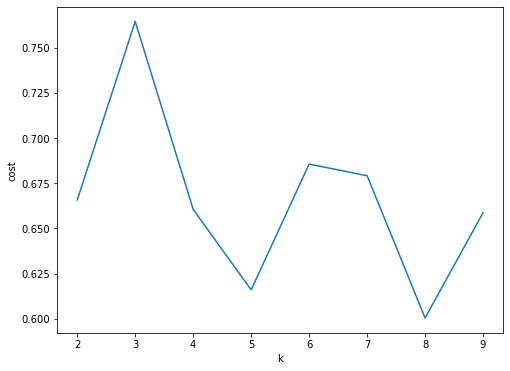

In [29]:
# visualize the silhouette scores in a plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(range(2, 10), silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [30]:
# train a k-means model

# train a k-means model and take local maximum (k=7)
k = 7
kmeans = KMeans().setK(k).setSeed(1)
model = kmeans.fit(data_scale_output)

# make predictions
predictions = model.transform(data_scale_output)

# evaluate clustering by computing silhouetthe score
evaluator_2 = ClusteringEvaluator()

silhouette_2 = evaluator_2.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette_2))

# display the results
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.5716012434003196
Cluster Centers: 
[  47.89335463 -122.28767951]
[  47.77163019 -117.45503962]
[  47.2314269  -122.53369492]
[  45.79029362 -122.65999362]
[  47.09100488 -120.29047805]
[  46.462625   -117.72800833]
[  46.46804242 -119.30954242]


In [31]:
# map centers
for i in range(0, len(centers)):
    icon_center = folium.Icon(color='red')
    folium.Marker(
        [centers[i][0], centers[i][1]], icon=icon_center,
        popup='Center ' + str(i+1),
    ).add_to(m)

m